In [0]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14260 sha256=82fc82e67f753a4cf3e120a185fd6a92f3e372de7e541264fbad6f4ed9f9bdbb
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [0]:
import pytrends

In [0]:
import pandas as pd

In [0]:
from pytrends.request import TrendReq

In [0]:
pytrends = TrendReq(hl = 'en-US', tz=360)

In [0]:
kw_list = ["cats","dogs"]

In [0]:
search_df = pytrends.get_historical_interest(kw_list, year_start=2017, month_start=1,day_start=1,hour_start=0, year_end=2017, month_end=2,day_end=1,hour_end=0, cat=0, geo='', gprop='', sleep=0)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


In [0]:
search_df

,cats,dogs,isPartial
date,,,
2017-01-01 00:00:00,27,81,False
2017-01-01 01:00:00,28,87,False
2017-01-01 02:00:00,29,89,False
2017-01-01 03:00:00,28,85,False
2017-01-01 04:00:00,26,76,False
...,...,...,...
2017-01-28 20:00:00,25,79,False
2017-01-28 21:00:00,27,84,False
2017-01-28 22:00:00,28,89,False


In [0]:
import matplotlib.pyplot as plt

[]

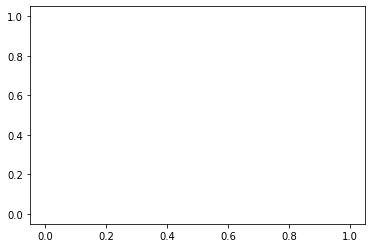

In [0]:
plt.plot()

In [0]:
search_df['cats'].shape

(749,)

In [0]:
cat_data = search_df['cats']

In [0]:
dog_data = search_df['dogs']

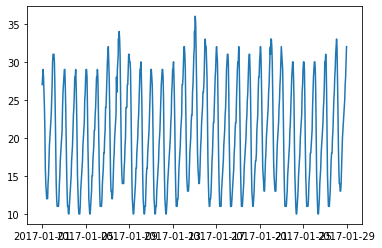

In [0]:
plt.plot(cat_data)

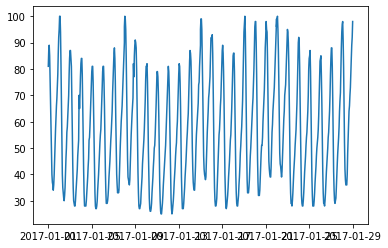

In [0]:
plt.plot(dog_data)

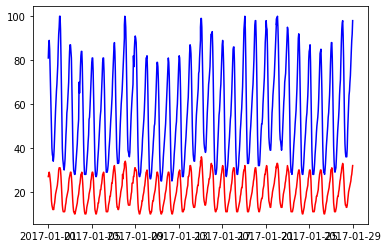

In [0]:
plt.plot(cat_data,'r')
plt.plot(dog_data,'b')

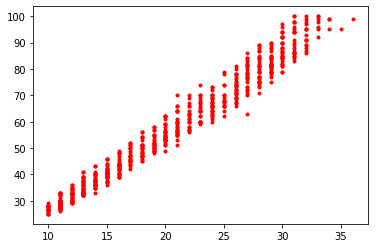

In [0]:
plt.plot(cat_data,dog_data,'.r')

In [0]:
kw_list = ["bitcoin","ethereum"]

In [0]:
search_df = pytrends.get_historical_interest(kw_list, year_start=2014, month_start=1,day_start=1,hour_start=0, year_end=2018, month_end=1, day_end=1,hour_end=0, cat=0, geo='', gprop='', sleep=0)

In [0]:
bitcoin_data = search_df['bitcoin']
ethereum_data = search_df['ethereum']

In [0]:
bitcoin_data

date
2015-01-07 00:00:00    100
2015-01-07 01:00:00     91
2015-01-07 02:00:00     87
2015-01-07 03:00:00     72
2015-01-07 04:00:00     70
                      ... 
2017-12-31 20:00:00     60
2017-12-31 21:00:00     60
2017-12-31 22:00:00     59
2017-12-31 23:00:00     59
2018-01-01 00:00:00     59
Name: bitcoin, Length: 26316, dtype: int64

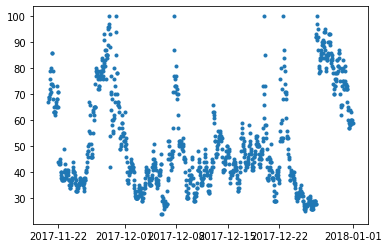

In [0]:
plt.plot(bitcoin_data[-1000:],'.')

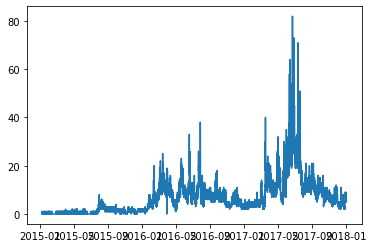

In [0]:
plt.plot(ethereum_data)

In [0]:
from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'

In [0]:
import requests
from datetime import datetime
import pandas as pd

def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)


def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,           'datetime_interval should be one of %s' % supported_intervals

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)

    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data


def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)
df = filter_empty_datapoints(df)

current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Filtering 124 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2020-01-17.csv


In [0]:
# import pandas as pd

# def read_dataset(filename):
#     print('Reading data from %s' % filename)
#     df = pd.read_csv(filename)
#     df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
#     df = df.set_index('datetime') 
#     df = df.sort_index() # sort by datetime
#     print(df.shape)
#     return df

# df = read_dataset(filename)

Reading data from BTC_USD_Bitstamp_day_2020-01-17.csv
(1877, 6)


In [0]:
df

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2014-11-28,360.57,381.34,363.59,376.28,8617.15,3.220878e+06
2014-11-29,372.25,386.60,376.42,376.72,7245.19,2.746157e+06
2014-11-30,373.32,381.99,376.57,373.34,3046.33,1.145567e+06
2014-12-01,373.03,382.31,376.40,378.39,6660.56,2.520662e+06
2014-12-02,375.23,382.86,378.39,379.25,6832.53,2.593576e+06
...,...,...,...,...,...,...
2020-01-13,8039.00,8196.81,8180.76,8105.01,4011.44,3.249416e+07
2020-01-14,8105.01,8895.00,8105.01,8813.04,17009.43,1.462252e+08
2020-01-15,8555.00,8903.20,8813.04,8809.17,8606.88,7.540127e+07


In [0]:
df['close']

datetime
2014-11-28     376.28
2014-11-29     376.72
2014-11-30     373.34
2014-12-01     378.39
2014-12-02     379.25
               ...   
2020-01-13    8105.01
2020-01-14    8813.04
2020-01-15    8809.17
2020-01-16    8710.15
2020-01-17    8892.65
Name: close, Length: 1877, dtype: float64

In [0]:
import matplotlib.pyplot as plt

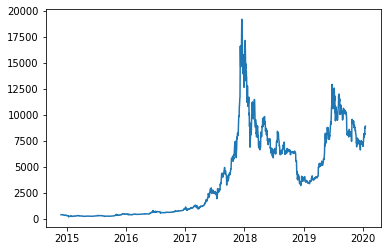

In [0]:
plt.plot(df['close'])

In [0]:
bitcoin_price = df['close']